In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)



In [3]:
SST_df = pd.read_csv('SST_concat.csv')

things to do - check discrepency between fix onset and fix offset and fix start time 

In [3]:
fix_df = SST_df[['NARGUID', 'TrialCode', 'Fix.RESP', 'Fix.RT', 'Fix.Duration', 'Fix.OffsetTime', 'Fix.OnsetTime', 'FixDur']]

In [ ]:
fix_df

the differences between Fix.Offset and Fix.Onset has a mean of ~200 
and is highly correlated with fix.duration

Finish time and Offset time align very closely, only 1-2 ms off. 
Start time and Onset time don't align as closely

In [4]:
fix_df['Calculated.Duration.Set'] = fix_df['Fix.OffsetTime'] - fix_df['Fix.OnsetTime']
fix_df['Calculated.Duration.Time'] = SST_df['Fix.FinishTime'] - SST_df['Fix.StartTime']

print(fix_df['Calculated.Duration.Time'].describe())
print(fix_df['Calculated.Duration.Set'].describe())
fix_df['FixDur'].describe()

count    71640.000000
mean      1211.007203
std        299.619877
min        600.000000
25%       1006.000000
50%       1184.000000
75%       1377.000000
max       2799.000000
Name: Calculated.Duration.Time, dtype: float64
count    71640.000000
mean      1124.019263
std        303.701368
min        480.000000
25%        944.000000
50%       1112.000000
75%       1278.000000
max       2766.000000
Name: Calculated.Duration.Set, dtype: float64


/Users/work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    71640.000000
mean      1334.413065
std        313.726460
min        700.000000
25%       1156.000000
50%       1329.000000
75%       1495.000000
max       2982.000000
Name: FixDur, dtype: float64

Text(0.5,1,'Length of fixation stimulus display')

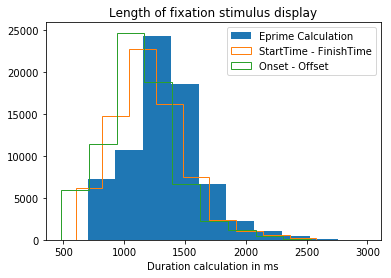

In [5]:
plt.hist(fix_df['FixDur'].dropna(), label = 'Eprime Calculation')

plt.hist(fix_df['Calculated.Duration.Time'].dropna(), histtype = 'step', label = 'StartTime - FinishTime')
plt.hist(fix_df['Calculated.Duration.Set'].dropna(), histtype = 'step', label = 'Onset - Offset')
plt.legend()
plt.xlabel('Duration calculation in ms')
plt.title('Length of fixation stimulus display')

In [6]:
print(fix_df[fix_df['TrialCode'] == 'IncorrectStop']['FixDur'].describe())
print(fix_df[fix_df['TrialCode'] == 'CorrectStop']['FixDur'].describe())
print(fix_df[fix_df['TrialCode'] == 'CorrectGo']['FixDur'].describe())
print(fix_df[fix_df['TrialCode'] == 'IncorrectGo']['FixDur'].describe())


count    5744.000000
mean     1336.367340
std       256.433669
min       702.000000
25%      1170.000000
50%      1309.000000
75%      1458.000000
max      2700.000000
Name: FixDur, dtype: float64
count    6196.000000
mean     1353.047127
std       257.609898
min       702.000000
25%      1203.000000
50%      1329.000000
75%      1465.000000
max      2650.000000
Name: FixDur, dtype: float64
count    51602.000000
mean      1354.994961
std        306.587746
min        700.000000
25%       1182.000000
50%       1341.000000
75%       1508.000000
max       2982.000000
Name: FixDur, dtype: float64
count    8098.000000
mean     1187.617683
std       387.118900
min       701.000000
25%       820.000000
50%      1143.000000
75%      1475.000000
max      2861.000000
Name: FixDur, dtype: float64


I think this is a degenerate plot 

(array([2844., 1150., 1074., 1580.,  930.,  310.,  126.,   50.,   28.,
           6.]),
 array([ 701.,  917., 1133., 1349., 1565., 1781., 1997., 2213., 2429.,
        2645., 2861.]),
 <a list of 1 Patch objects>)

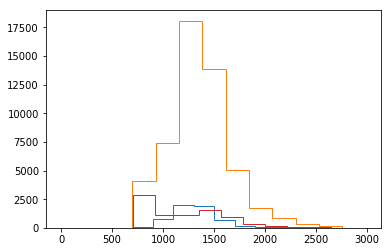

In [7]:
plt.hist(fix_df[fix_df['TrialCode'] == 'IncorrectStop']['FixDur'], histtype = 'step')
plt.hist(fix_df[fix_df['TrialCode'] == 'CorrectGo']['FixDur'], histtype = 'step')
plt.hist(fix_df[fix_df['TrialCode'] == 'CorrecttStop']['FixDur'], histtype = 'step')
plt.hist(fix_df[fix_df['TrialCode'] == 'IncorrectGo']['FixDur'], histtype = 'step')

Text(0.5,1.08,'Associations of Different Duration Calculations')

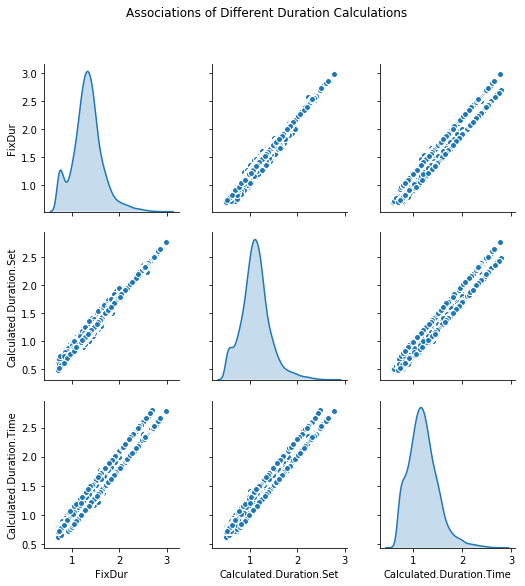

In [11]:
g = sns.pairplot(fix_df[['FixDur', 'Calculated.Duration.Set', 'Calculated.Duration.Time']].dropna() / 1000, 
              diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
g.fig.suptitle("Associations of Different Duration Calculations", y=1.08)

In [34]:
for i in SST_df['NARGUID'].unique(): 
    print(i)
    sub_df = SST_df.loc[SST_df['NARGUID'] == i]
    num_stops = sub_df['SSD.OnsetToOnsetTime'].isnull()
    num_trials = sub_df['Go.OnsetTime'].isnull()
   # print(sum(num_trials == False))
    print(sum(num_stops == False) != 120)
    
    #print(len(sub_df['Running[Trial]'].unique()))

9PLKGRTV
False
LZVJ5RNK
False
GVPPRTDN
False
TZUEJ54R
False
G7TMENCV
False
RJ67E8PE
False
XAP1L366
False
P205AX39
False
RKD7U24Y
False
N98DVNK8
False
X3GV1FW0
False
GVDCETLW
False
H5RD2CM2
False
VM0AGJA5
False
DAF6VRMG
False
AKPAUM7W
False
APJKJ5KB
False
TMRGF3F4
False
GD3DDK38
False
AF517NF3
False
B9J9H4PK
False
NPNAGWRF
False
HEABF6E2
False
BN8Z67UX
False
N2TF0U03
False
BLGYX1M4
False
DD0V
False
P79AXMBD
False
DEPBAJ6L
False
XB938J8E
False
N98L0THW
False
B5C9G957
False
JH22CRH8
False
B8AV1T7K
False
U2BFUB9N
False
GORK2YC
False
LEND5NH4
False
TE1J
False
PATP4RPG
False
CW8WDA3J
False
ANEX1Y2H
False
JT03Z8N3
False
ZLEFF9ZA
False
FTJ00JVU
False
KPF4GFHV
False
XN6HMGK8
False
NUNMDE7M
False
A52LKE4U
False
TDJD7JZ2
False
UJTA9MD9
False
X3PYJZPC
False
WGXZKM4X
False
BU9KJZX7
False
XHEEJUKX
False
RCW2KYAP
False
P8CFEA4E
False
JD8XXLGE
False
FRT7F0C9
False
YVJATKX1
False
HF0XT8CF
False
LMAAJ8JJ
False
UH0F2U1W
False
JPH56X7G
False
BMMEGVWT
False
RD5CYYL7
False
A1MV25KY
False
R17JHZRJ
False
MHDD

In [39]:
for i in SST_df['NARGUID'].unique(): 
    print(i)
    sub_df = SST_df.loc[SST_df['NARGUID'] == i]

   # print(len(sub_df.loc[sub_df['Procedure[SubTrial]'] =='GoTrial']))
    print(len(sub_df.loc[sub_df['TrialCode'] =='StopTooEarly']))    

9PLKGRTV
0
LZVJ5RNK
0
GVPPRTDN
0
TZUEJ54R
0
G7TMENCV
0
RJ67E8PE
0
XAP1L366
0
P205AX39
0
RKD7U24Y
0
N98DVNK8
0
X3GV1FW0
0
GVDCETLW
0
H5RD2CM2
0
VM0AGJA5
0
DAF6VRMG
0
AKPAUM7W
0
APJKJ5KB
0
TMRGF3F4
0
GD3DDK38
0
AF517NF3
0
B9J9H4PK
0
NPNAGWRF
0
HEABF6E2
0
BN8Z67UX
0
N2TF0U03
0
BLGYX1M4
0
DD0V
0
P79AXMBD
0
DEPBAJ6L
0
XB938J8E
0
N98L0THW
0
B5C9G957
0
JH22CRH8
0
B8AV1T7K
0
U2BFUB9N
0
GORK2YC
0
LEND5NH4
0
TE1J
0
PATP4RPG
0
CW8WDA3J
0
ANEX1Y2H
0
JT03Z8N3
0
ZLEFF9ZA
0
FTJ00JVU
0
KPF4GFHV
0
XN6HMGK8
0
NUNMDE7M
0
A52LKE4U
0
TDJD7JZ2
0
UJTA9MD9
0
X3PYJZPC
0
WGXZKM4X
0
BU9KJZX7
0
XHEEJUKX
0
RCW2KYAP
0
P8CFEA4E
0
JD8XXLGE
0
FRT7F0C9
0
YVJATKX1
0
HF0XT8CF
0
LMAAJ8JJ
0
UH0F2U1W
0
JPH56X7G
0
BMMEGVWT
0
RD5CYYL7
0
A1MV25KY
0
R17JHZRJ
0
MHDDJ00W
0
E6T95560
0
AU1UT
0
F9U3MCN7
0
X56RV3XT
0
E29JDT7Y
0
KTLE69Y8
0
AKMT4BEA
0
RAR30NKY
0
HPU5TKNF
0
PATH0UC3
0
46VZ
0
LXKCG48T
0
JCAMAY91
0
TY79VFHF
0
Z49U1FM4
0
UYAENUJR
0
GECVZYV4
0
EGER8LYM
0
9R23N8LH
0
9RUX0DHA
0
V9Z7KCBE
0
FPG0VGT4
0
NM82BUZL
0
HXHUVGJG
0
FKFN

In [42]:
SST_df['ExperimentName'].value_counts()

SST_SP_20161208                             34038
SST_SP_20161208_TWoptimized_Consolidated    19032
SST_GE_20161208_TWoptimized_Consolidated    11088
SST_Goggles_20161208                         5124
SST_20160830                                 2196
SST_SP_20170411                              2196
Name: ExperimentName, dtype: int64

In [43]:
len(SST_df['ExperimentName'])

73674